<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("/Users/kaylahoffman/Desktop/DSCI552_HW0/Salaries.csv")
df_salaries = pd.read_csv(file_path)

df_salaries = df_salaries.set_index('playerID')

df_salaries.head()

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [4]:
# Skip the first row and perform filtering
filtered_df = df_salaries.iloc[1:][
    (df_salaries.iloc[1:]['teamID'].isin(['ATL', 'HOU'])) & 
    (df_salaries.iloc[1:]['salary'].astype(float) > 1000000)
]

# The index of filtered_df will be the selected playerIDs
selected_ids = filtered_df.index

print(selected_ids)

Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01',
       'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05',
       ...
       'feldmsc01', 'gonzama01', 'gregelu01', 'lowrije01', 'neshepa01',
       'quallch01', 'rasmuco01', 'singljo02', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=595)


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [5]:
stats = df_salaries[df_salaries['teamID'] == 'ATL']['salary'].describe()

std_dev = stats['std']
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
mean = stats['mean']
maximum = stats['max']
minimum = stats['min']

print("Max:", maximum)
print("Standard Deviation:", std_dev)
print("First Quartile:", q1)
print("Median:", median)
print("Mean:", mean)
print("Minimum:", minimum)


Max: 16061802.0
Standard Deviation: 3432672.9832373876
First Quartile: 300000.0
Median: 600000.0
Mean: 2206239.316027088
Minimum: 60000.0


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [6]:
# Assuming df_salaries is your DataFrame
salaries_dict = df_salaries.to_dict(orient='list')

def pretty_print_dict(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key) + ':')
        if isinstance(value, dict):
            pretty_print_dict(value, indent + 1)
        else:
            print('\t' * (indent + 1) + str(value))

# Print first 5 lines of the dictionary
for key, value in salaries_dict.items():
    print(f"{key}: {value[:5]}")



yearID: [1985, 1985, 1985, 1985, 1985]
teamID: ['ATL', 'ATL', 'ATL', 'ATL', 'ATL']
lgID: ['NL', 'NL', 'NL', 'NL', 'NL']
salary: [870000, 550000, 545000, 633333, 625000]


#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [7]:
import pandas as pd

# Assuming salaries_dict is your dictionary
df_salaries2 = pd.DataFrame(salaries_dict)

# Rename the columns to a, b, c, ...
new_columns = ['a', 'b', 'c', 'd', 'e'][:len(df_salaries2.columns)]
df_salaries2.columns = new_columns

# Print the first few rows of the new DataFrame
print(df_salaries2.head())


      a    b   c       d
0  1985  ATL  NL  870000
1  1985  ATL  NL  550000
2  1985  ATL  NL  545000
3  1985  ATL  NL  633333
4  1985  ATL  NL  625000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [8]:
import numpy as np

# Create a 2D Python list
python_2d_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

print("2D Python list:")
print(python_2d_list)

# Convert the 2D list to a NumPy array
numpy_array = np.array(python_2d_list)

print("\nNumPy array:")
print(numpy_array)


2D Python list:
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

NumPy array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [9]:
numpy_array.ndim
numpy_array.dtype

numpy_array.itemsize

8

#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [10]:
numpy_array.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [11]:
numpy_array[1:]

array([[4, 5, 6],
       [7, 8, 9]])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [12]:
numpy_array.max()
numpy_array.mean()

5.0

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [17]:
# numpy_array.ones()

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

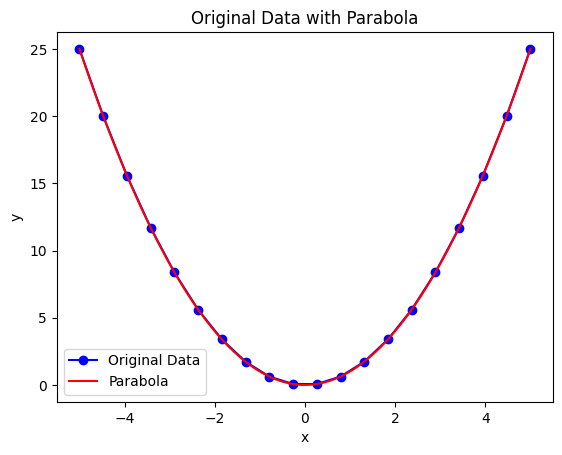

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Original code
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the original data
ax.plot(x, y, 'bo-', label='Original Data')

# Generate points for a smooth parabola
x_parabola = np.linspace(-5, 5, 100)
y_parabola = x_parabola ** 2

# Plot the parabola
ax.plot(x_parabola, y_parabola, 'r-', label='Parabola')

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Original Data with Parabola')
ax.legend()

# Display the plot
plt.show()


What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

In [19]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

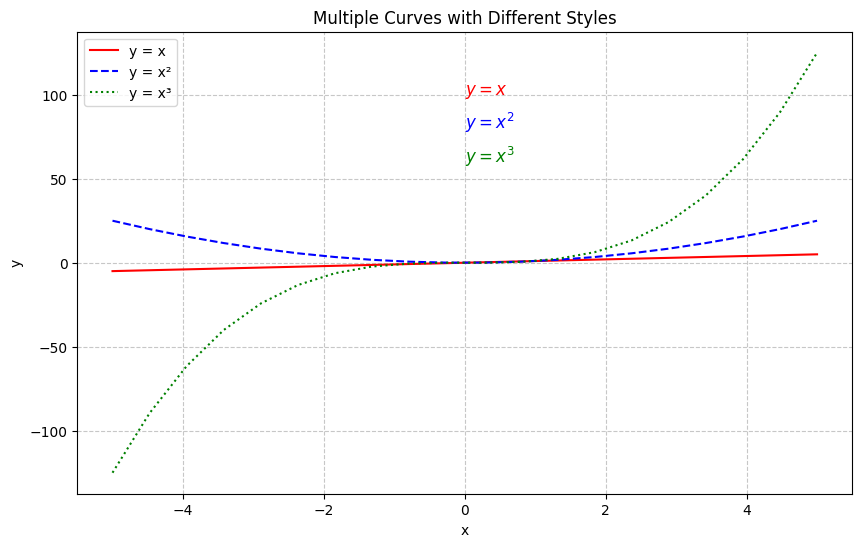

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the curves with different styles
plt.plot(x, y1, 'r-', label='y = x')
plt.plot(x, y2, 'b--', label='y = x²')
plt.plot(x, y3, 'g:', label='y = x³')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Curves with Different Styles')

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add mathematical equations as text
plt.text(0, 100, r'$y = x$', fontsize=12, color='red')
plt.text(0, 80, r'$y = x^2$', fontsize=12, color='blue')
plt.text(0, 60, r'$y = x^3$', fontsize=12, color='green')

# Show the plot
plt.show()


(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

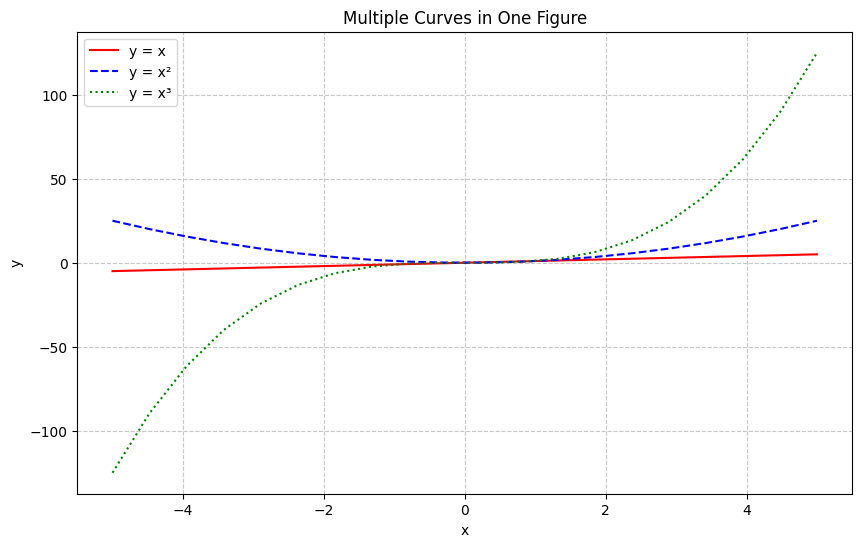

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot all three curves on the same axes
plt.plot(x, y1, 'r-', label='y = x')
plt.plot(x, y2, 'b--', label='y = x²')
plt.plot(x, y3, 'g:', label='y = x³')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Curves in One Figure')

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

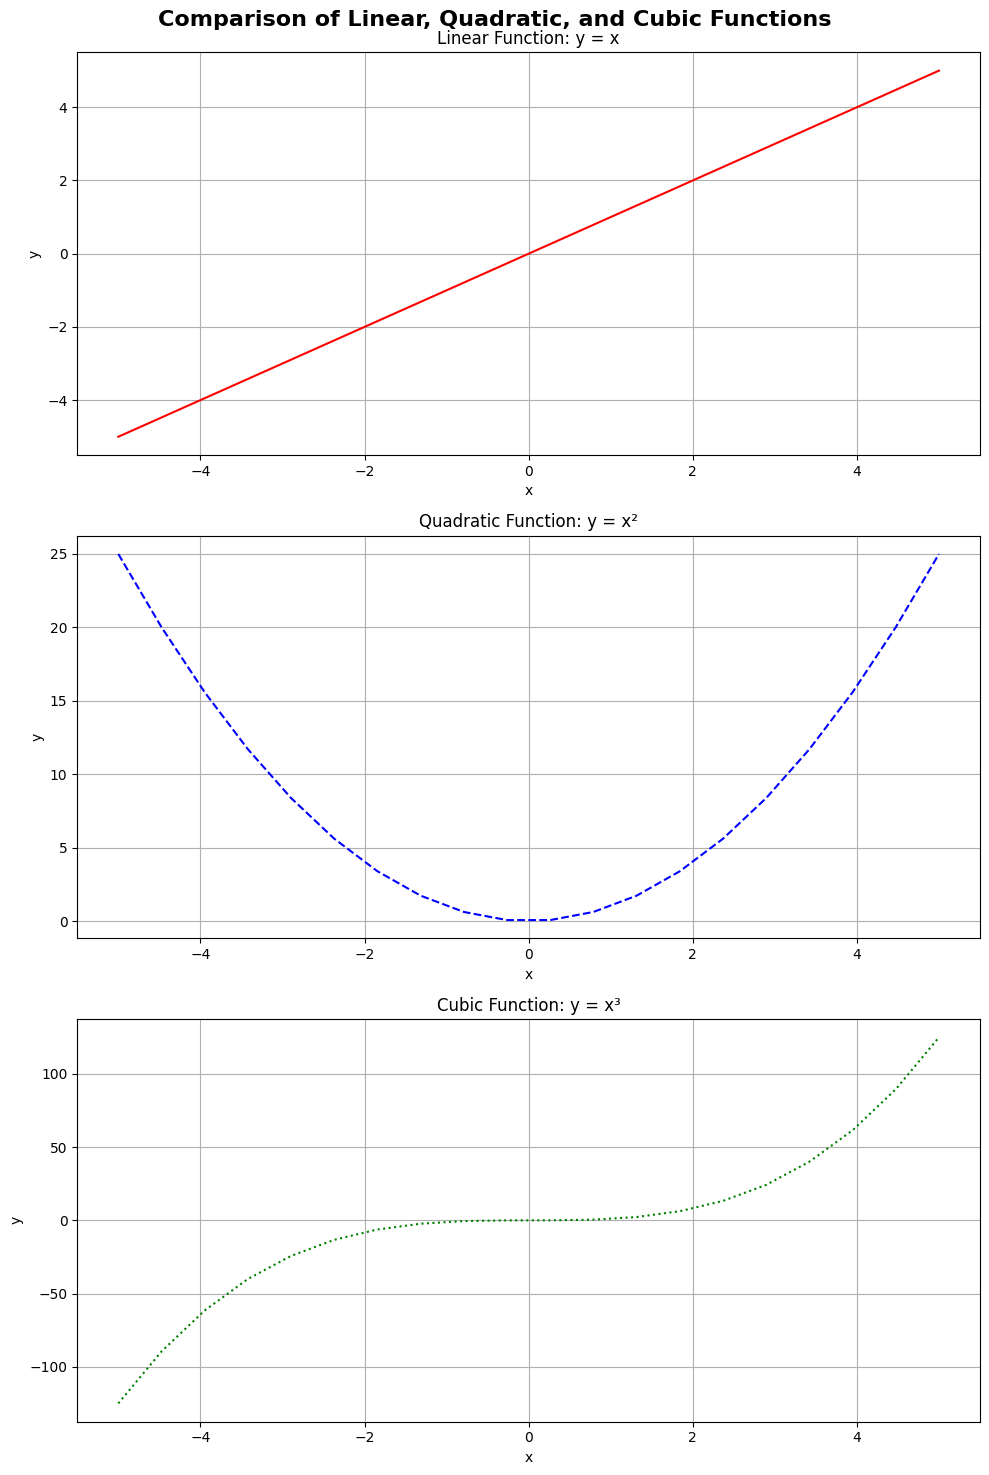

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# Create a figure with 3 subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Set a main title for the entire figure
fig.suptitle('Comparison of Linear, Quadratic, and Cubic Functions', fontsize=16, fontweight='bold')

# Plot y1 on the first subplot
ax1.plot(x, y1, 'r-')
ax1.set_title('Linear Function: y = x', fontsize=12)
ax1.set_xlabel('x', fontsize=10)
ax1.set_ylabel('y', fontsize=10)
ax1.grid(True)

# Plot y2 on the second subplot
ax2.plot(x, y2, 'b--')
ax2.set_title('Quadratic Function: y = x²', fontsize=12)
ax2.set_xlabel('x', fontsize=10)
ax2.set_ylabel('y', fontsize=10)
ax2.grid(True)

# Plot y3 on the third subplot
ax3.plot(x, y3, 'g:')
ax3.set_title('Cubic Function: y = x³', fontsize=12)
ax3.set_xlabel('x', fontsize=10)
ax3.set_ylabel('y', fontsize=10)
ax3.grid(True)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

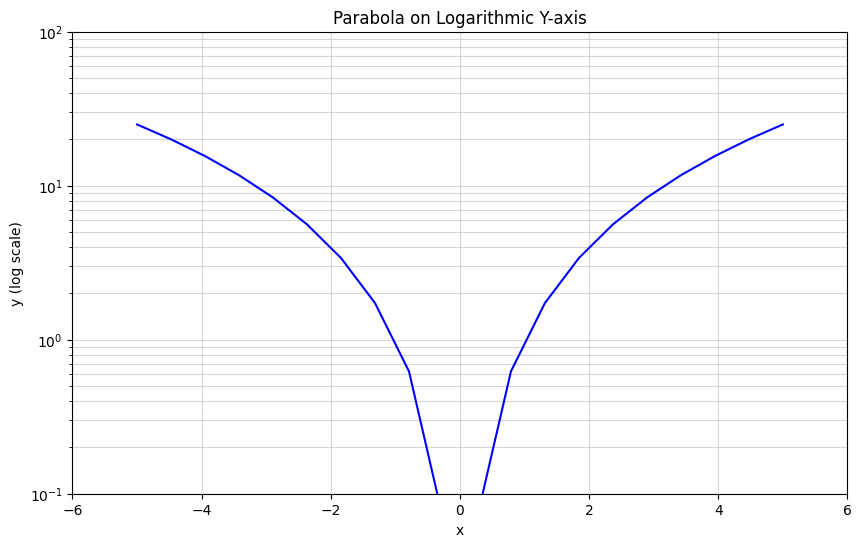

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the parabola using logarithmic scales
# We use abs() to handle negative values, and add a small value to avoid log(0)
plt.semilogy(x, abs(y) + 1e-10, 'b-')

# Set x-axis limits
plt.xlim(-6, 6)

# Set y-axis limits
plt.ylim(1e-1, 1e2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y (log scale)')
plt.title('Parabola on Logarithmic Y-axis')

# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5)

# Show the plot
plt.show()


### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

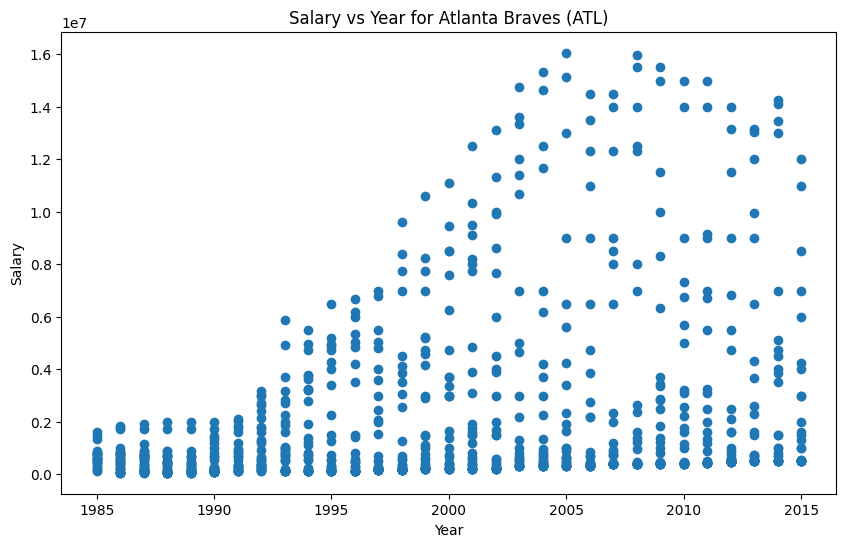

In [24]:
import matplotlib.pyplot as plt

# Filter the data for team 'ATL'
atl_data = df_salaries[df_salaries['teamID'] == 'ATL']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(atl_data['yearID'], atl_data['salary'])

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Salary vs Year for Atlanta Braves (ATL)')

# Show the plot
plt.show()


(b) For year 1985, plot a bar chart to show the average salary for each team.

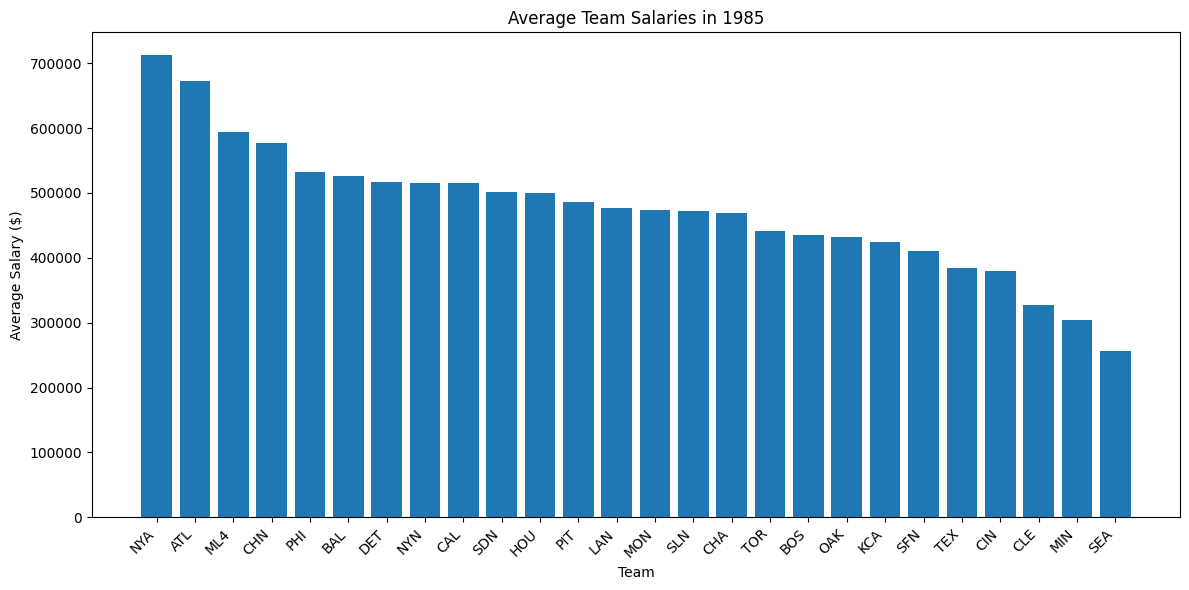

In [25]:
import matplotlib.pyplot as plt

# Filter the data for the year 1985
df_1985 = df_salaries[df_salaries['yearID'] == 1985]

# Calculate the average salary for each team
avg_salaries = df_1985.groupby('teamID')['salary'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_salaries.index, avg_salaries.values)

# Set labels and title
plt.xlabel('Team')
plt.ylabel('Average Salary ($)')
plt.title('Average Team Salaries in 1985')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

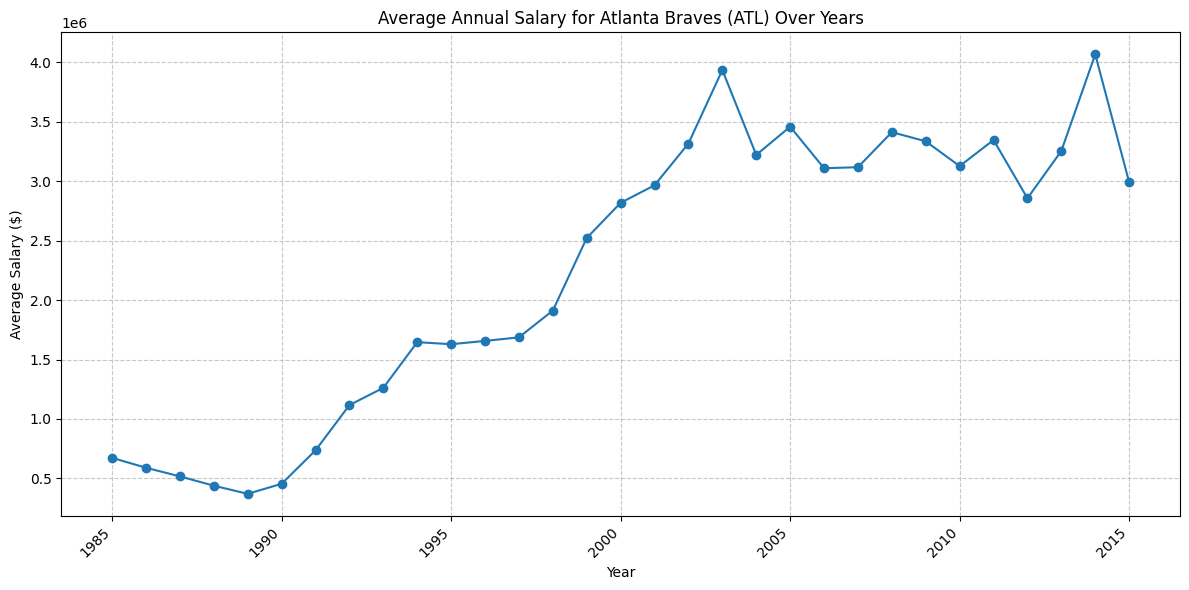

In [26]:
# Filter the data for ATL 
df_ATL = df_salaries[df_salaries['teamID'] == 'ATL']

# Calculate the average salary for each year for ATL
avg_salaries_ATL = df_ATL.groupby('yearID')['salary'].mean().sort_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_salaries_ATL.index, avg_salaries_ATL.values, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')
plt.title('Average Annual Salary for Atlanta Braves (ATL) Over Years')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

/var/folders/09/73wvt1t102l9g7hdmc9gkxzm0000gn/T/ipykernel_21635/1519163765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ATL['performance_score'] = np.random.randint(1, 100, size=len(df_ATL))


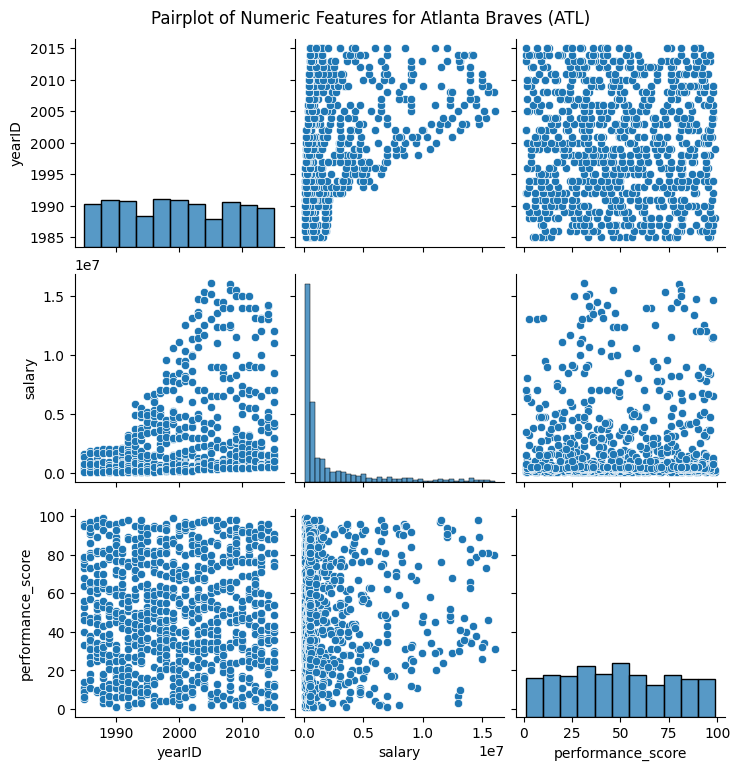

In [29]:
import seaborn as sns 

# Filter the data for team 'ATL'
df_ATL = df_salaries[df_salaries['teamID'] == 'ATL']

# Add a new random numeric feature (e.g., 'performance_score')
df_ATL['performance_score'] = np.random.randint(1, 100, size=len(df_ATL))

# Select numeric features
numeric_features = ['yearID', 'salary', 'performance_score']

# Create the pairplot
sns.pairplot(df_ATL[numeric_features], height=2.5, aspect=1)

# Set title
plt.suptitle('Pairplot of Numeric Features for Atlanta Braves (ATL)', y=1.02)

# Show the plot
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

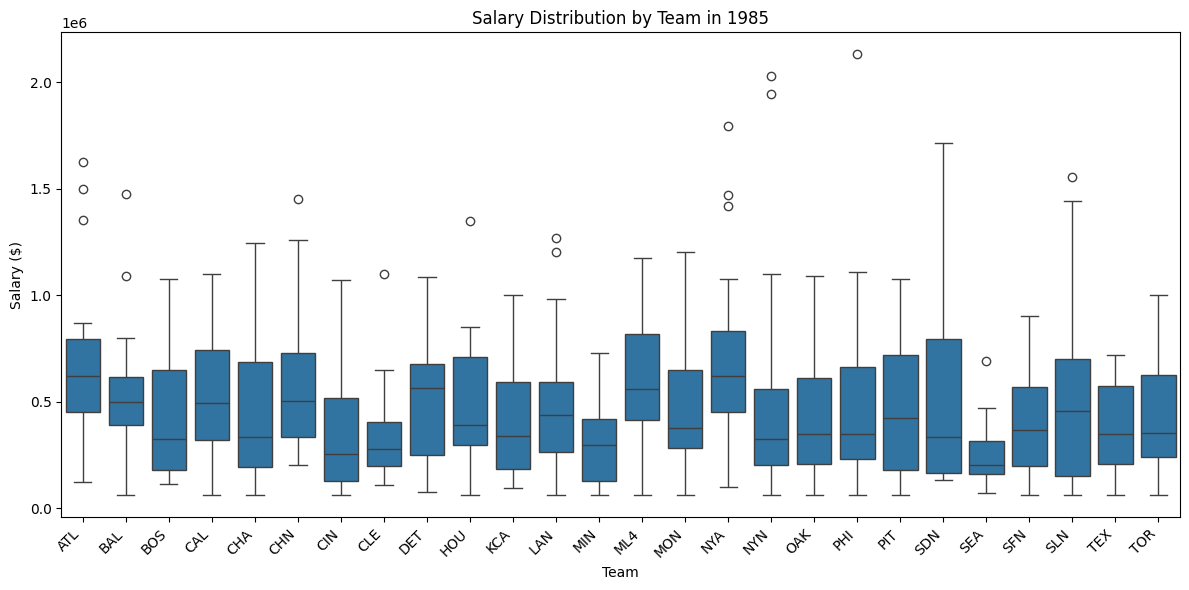

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the year 1985
df_1985 = df_salaries[df_salaries['yearID'] == 1985]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='teamID', y='salary', data=df_1985)

# Set labels and title
plt.xlabel('Team')
plt.ylabel('Salary ($)')
plt.title('Salary Distribution by Team in 1985')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.